# 1. EDA:
- EDA of original data
- prepare data for pivoting
- create a pivot table & fillna
- take a random subset of data
- export subset

In [1]:
# imports

import pandas as pd
import numpy as np
import json
import gzip
import matplotlib.pyplot as plt

In [2]:
# define file paths

path = 'original_data/'
path_reviews = path + 'review-Utah_10.json.gz'

In [3]:
# define a generator to read data from the files

def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)

In [4]:
# check what the generator returns

reviews_generator = parse(path_reviews)
print(next(reviews_generator))

{'user_id': '111182595077674366891', 'name': 'Liz W Poch', 'time': 1627085008811, 'rating': 5, 'text': "Paige is the best! Everyone at this branch is super friendly and incredibly helpful! They always go the extra mile to make sure I have a great experience. I'm always so impressed with the staff when I stop by. Thank you!", 'pics': None, 'resp': None, 'gmap_id': '0x87528767d0ec0e4d:0x7a2f1637a6fb6925'}


In [5]:
# import reviews line by line using the generator, then build a dataframe

reviews = pd.DataFrame(parse(path_reviews))

In [6]:
# check the reviews dataframe

reviews.head(1)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,111182595077674366891,Liz W Poch,1627085008811,5,Paige is the best! Everyone at this branch is ...,None,None,0x87528767d0ec0e4d:0x7a2f1637a6fb6925


In [7]:
# check how many users reviewed the same business more than once

reviews.duplicated(('name','gmap_id')).sum()

97696

In [8]:
# sort the review from oldest to newest using time

reviews = reviews.sort_values(by='time', ascending=True)
reviews

,user_id,name,time,rating,text,pics,resp,gmap_id
2227652,103953734659828521706,Tom Steinmetz,662601600000,4,None,None,None,0x8752f314d567a6c5:0x31bbf92c6457aef8
3667052,103953734659828521706,Tom Steinmetz,1181260800000,4,None,None,None,0x87526d61243db6e3:0xb045f6e31c1b6966
1151790,103953734659828521706,Tom Steinmetz,1181260800000,4,None,None,None,0x875272bd3094d339:0x18facd19d6d50a50
1217861,103953734659828521706,Tom Steinmetz,1181260800000,4,None,None,None,0x875272bec4b0b3fd:0x28d2e2be9d0736e0
2239298,103953734659828521706,Tom Steinmetz,1181260800000,3,None,None,None,0x87527df316304bd5:0xccd41e816cd3c019
...,...,...,...,...,...,...,...,...
3220,108316443302628768024,Django Elliott,1630971541054,5,The only good thing about visiting BYU campus ...,None,None,0x874d91849210a319:0x19cdf8bc28151973
3231,113452956114726326632,Jimmy Xiao,1630974227314,5,None,None,None,0x874d91849210a319:0x19cdf8bc28151973
3221,113540319181739004410,Jason Porter,1630974826544,5,I haven't been there since it's become Pride C...,None,None,0x874d91849210a319:0x19cdf8bc28151973
3223,115944644482711554202,Matthew Busi,1630982019482,5,Incredible courage in a time of divisive hate....,None,None,0x874d91849210a319:0x19cdf8bc28151973


In [9]:
# if same user reviewed the same business more than once, only keep the most recent review

reviews = reviews.drop_duplicates(subset=['user_id','gmap_id'], keep='last')
reviews

,user_id,name,time,rating,text,pics,resp,gmap_id
2227652,103953734659828521706,Tom Steinmetz,662601600000,4,None,None,None,0x8752f314d567a6c5:0x31bbf92c6457aef8
3667052,103953734659828521706,Tom Steinmetz,1181260800000,4,None,None,None,0x87526d61243db6e3:0xb045f6e31c1b6966
1151790,103953734659828521706,Tom Steinmetz,1181260800000,4,None,None,None,0x875272bd3094d339:0x18facd19d6d50a50
1217861,103953734659828521706,Tom Steinmetz,1181260800000,4,None,None,None,0x875272bec4b0b3fd:0x28d2e2be9d0736e0
2239298,103953734659828521706,Tom Steinmetz,1181260800000,3,None,None,None,0x87527df316304bd5:0xccd41e816cd3c019
...,...,...,...,...,...,...,...,...
3220,108316443302628768024,Django Elliott,1630971541054,5,The only good thing about visiting BYU campus ...,None,None,0x874d91849210a319:0x19cdf8bc28151973
3231,113452956114726326632,Jimmy Xiao,1630974227314,5,None,None,None,0x874d91849210a319:0x19cdf8bc28151973
3221,113540319181739004410,Jason Porter,1630974826544,5,I haven't been there since it's become Pride C...,None,None,0x874d91849210a319:0x19cdf8bc28151973
3223,115944644482711554202,Matthew Busi,1630982019482,5,Incredible courage in a time of divisive hate....,None,None,0x874d91849210a319:0x19cdf8bc28151973


In [10]:
# check again how many users reviewed the same business more than once

reviews.duplicated(('user_id','gmap_id')).sum()

0

In [11]:
# calculate how many reviews per user

reviews.groupby('user_id')['name'].count()

user_id
100000005407612307509    10
100000094753815343439    10
100000149611993816967    52
100000178014942132324    18
100000312767780957949    28
                         ..
118446168741339783991    10
118446212207189694477    11
118446463806473801425    12
118446645564139819768    44
118446668130728858336    14
Name: name, Length: 160766, dtype: int64

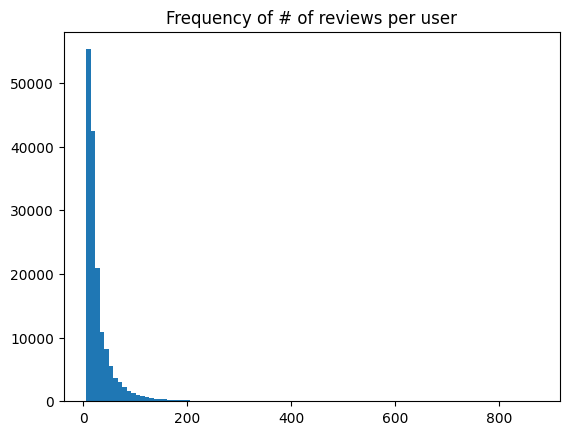

In [12]:
# use a histogram to visualize how many reviews per user

plt.hist(reviews.groupby('user_id')['name'].count(), bins=100)
plt.title('Frequency of # of reviews per user');

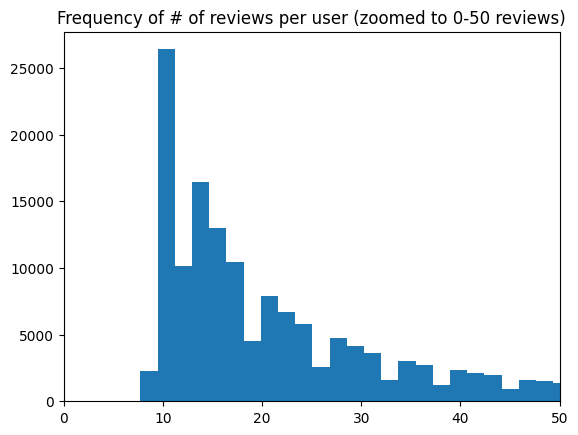

In [13]:
# zoom up to review counts under 50

plt.hist(reviews.groupby('user_id')['name'].count(), bins=500)
plt.xlim(0, 50)
plt.title('Frequency of # of reviews per user (zoomed to 0-50 reviews)');

In [14]:
# check how many unique users there are

reviews['user_id'].nunique()

160766

In [15]:
# check how many unique businesses there are

reviews['gmap_id'].nunique()

34689

In [16]:
# create a pivot table with the user_id and business id

pivot = reviews.pivot(index='user_id',columns='gmap_id', values='rating')

/var/folders/bh/crnltg950_n8l07mfm97qdtc0000gn/T/ipykernel_79903/2575346230.py:3: PerformanceWarning: The following operation may generate 5576811774 cells in the resulting pandas object.
  pivot = reviews.pivot(index='user_id',columns='gmap_id', values='rating')


In [17]:
# check the resulting pivot table

pivot.fillna(0, inplace=True)
pivot

gmap_id,0x0:0xd255223c6c0c42e6,0x152e17f2ebc0c523:0x42f5dc12a26572bd,0x15325dadf785f673:0x9ee8c0ca0310e853,0x4065885ad5248b3d:0x9b822de97a85c65d,0x4065f0e9bebbdef5:0xa39da047ffe81e39,0x4065f12112a6fe95:0xf7782e2b18fb66a9,0x4065f123dee5f5cf:0xba7fe8ce7d06b3e8,0x4065f3f9fd551245:0xf9bea78a9e4281,0x4065f478f0660e93:0xa83c1fd7f568fed1,0x4065f49b17082a67:0x8079e884d6a8154b,...,0x89c2e4af036f6859:0x7747897a38667e02,0x89c2ff9adad0bba9:0xcdbcafa93239c417,0x89c39dee75dc1963:0xcba9c3753927ed6c,0x89c3b1a62ade7455:0x108bf810862862fb,0x89c3ce00eb4d9e63:0x7ce7fb610d379f15,0x89c80350fabc8715:0xb7e0d5691eae270d,0x89c80faebad96de5:0xf63ef750265eced9,0x89de0c9ab6311f93:0xaf0e8db707d1ffd9,0x89e483423f8d55ff:0xb01d0d5d8e57ce37,0x89e7c11a8fb8c261:0x3036a2d129f81d1f
user_id,,,,,,,,,,,,,,,,,,,,,
100000005407612307509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100000094753815343439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100000149611993816967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100000178014942132324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100000312767780957949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118446168741339783991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118446212207189694477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118446463806473801425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# take a random subset of the users

subset = pivot.sample(n=10000)

In [19]:
# check the subset

subset

gmap_id,0x0:0xd255223c6c0c42e6,0x152e17f2ebc0c523:0x42f5dc12a26572bd,0x15325dadf785f673:0x9ee8c0ca0310e853,0x4065885ad5248b3d:0x9b822de97a85c65d,0x4065f0e9bebbdef5:0xa39da047ffe81e39,0x4065f12112a6fe95:0xf7782e2b18fb66a9,0x4065f123dee5f5cf:0xba7fe8ce7d06b3e8,0x4065f3f9fd551245:0xf9bea78a9e4281,0x4065f478f0660e93:0xa83c1fd7f568fed1,0x4065f49b17082a67:0x8079e884d6a8154b,...,0x89c2e4af036f6859:0x7747897a38667e02,0x89c2ff9adad0bba9:0xcdbcafa93239c417,0x89c39dee75dc1963:0xcba9c3753927ed6c,0x89c3b1a62ade7455:0x108bf810862862fb,0x89c3ce00eb4d9e63:0x7ce7fb610d379f15,0x89c80350fabc8715:0xb7e0d5691eae270d,0x89c80faebad96de5:0xf63ef750265eced9,0x89de0c9ab6311f93:0xaf0e8db707d1ffd9,0x89e483423f8d55ff:0xb01d0d5d8e57ce37,0x89e7c11a8fb8c261:0x3036a2d129f81d1f
user_id,,,,,,,,,,,,,,,,,,,,,
111345660548024032849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112495083691420699368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107975892098160716605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100884174273412829862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104807764700162644983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117171191765986322970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109383045243908656158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104402884216221716964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# export the subset to parquet

# subset.to_parquet('data/subset.parquet', index=True)